In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [10]:
trainXY = pd.read_pickle("../pkl_trainsets/23may2018/not-scaled_trainset_nucs_fissact_8dec.pkl")
trainXY.head()

,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba138,ce140,ce142,ce144,cs133,...,xe131,xe132,xe134,xe136,y89,zr91,zr92,zr93,zr94,zr96
0.000e+00,0,0.000000,1.5,ce14x14,pwr,0.0000,0.0000,0.0000,0.0,0.0000,...,0.0,0.0000,0.000,0.00,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
1.000e+02.1,3000,0.000694,1.5,ce14x14,pwr,0.9070,0.6846,0.7816,0.0,0.8243,...,0.0,0.5795,1.066,1.54,0.2827,0.3157,0.7848,0.830,0.8538,0.8497
1.070e+02,3000,7.000000,1.5,ce14x14,pwr,0.9074,0.7367,0.7824,0.0,0.8716,...,0.0,0.6014,1.067,1.54,0.3129,0.3509,0.7876,0.835,0.8539,0.8497
1.300e+02,3000,30.000000,1.5,ce14x14,pwr,0.9074,0.8212,0.7824,0.0,0.9029,...,0.0,0.6075,1.067,1.54,0.3940,0.4481,0.7876,0.835,0.8539,0.8497
4.653e+02,3000,365.250000,1.5,ce14x14,pwr,0.9074,0.8552,0.7824,0.0,0.9045,...,0.0,0.6076,1.067,1.54,0.6106,0.7524,0.7876,0.835,0.8539,0.8497


In [11]:
x = len(trainXY.columns)
dfX = trainXY.iloc[:, 5:x]
dfY_b = trainXY.iloc[:, 0] # burnup
dfY_c = trainXY.iloc[:, 1] # cooling time
dfY_e = trainXY.iloc[:, 2] # enrichment
dfY_o = trainXY.iloc[:, 3] # origen rxtr
dfY_r = trainXY.iloc[:, 4] # rxtr type

In [12]:
x = dfY_b
y = dfY_e
df = pd.DataFrame({'Burnup [MW/MTHM]': x, 'Enrichmnent [Weight% U235]': y}, 
                  columns=['Burnup [MW/MTHM]', 'Enrichmnent [Weight% U235]'])
#bin stuff
xbin = 1500
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

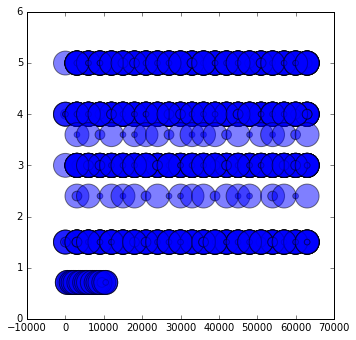

In [13]:
fig, axScatter = plt.subplots(figsize=(5.5, 5.5))
axScatter.scatter(x, y, s=ycount*0.25, alpha=0.5)
plt.show()

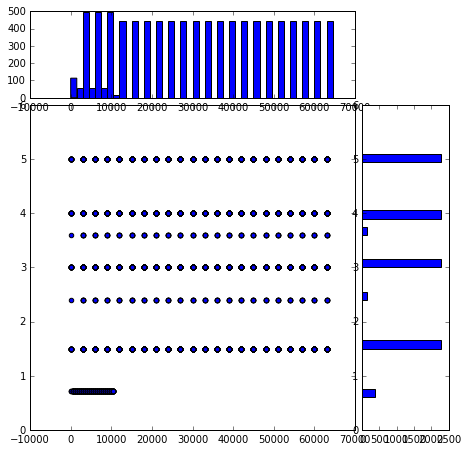

In [14]:
fig.clf()
fig, axScatter = plt.subplots(figsize=(7.5,7.5))
axScatter.scatter(x, y)
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)
axHistx.hist(x, bins=xbins)
axHisty.hist(y, bins=ybins, orientation='horizontal')
#plt.draw()
plt.show()

In [14]:
#axHistx.set_yticks([0, 50, 100])
#axHisty.set_xticks([0, 50, 100])

In [26]:
fig.clf()
fig, ax = plt.subplots(figsize=(5.5, 5.5))
scatcolor = ax.scatter(x, y, cmap='inferno')
ax.axis([0, xmax, 0, ymax])
cb = fig.colorbar(scatcolor, ax=ax)
cb.set_label('Count of Instances')

TypeError: You must first set_array for mappable